In [108]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import numpy as np
PLOT_FOLDER = "../data/raw/plots/filmseries/"
PLOT_FOLDER_REVENUE = "../data/raw/plots/filmseriesrevenue/"

In [109]:
# loading file
df = pd.read_csv('../data/processed/movie_stats/movie_stats.csv')

In [110]:
len(df)

33

In [111]:
df.head()

,Unnamed: 0,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue
0,0,The Marvels,tt10676048,2023-11-08,{'Brie Larson': 'Carol Danvers / Captain Marve...,['Nia DaCosta'],"['Marvel Studios', 'Kevin Feige Productions']",274800000,108998133
1,1,Guardians of the Galaxy Vol. 3,tt6791350,2023-05-03,"{'Chris Pratt': 'Peter Quill / Star-Lord', 'Zo...",['James Gunn'],"['Marvel Studios', 'Kevin Feige Productions']",250000000,845430302
2,2,Spider-Man: No Way Home,tt10872600,2021-12-15,"{'Tom Holland': 'Peter Parker / Spider-Man', '...",['Jon Watts'],"['Marvel Studios', 'Pascal Pictures', 'Columbi...",200000000,1921847111
3,3,Avengers: Infinity War,tt4154756,2018-04-25,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...","['Anthony Russo', 'Joe Russo']",['Marvel Studios'],300000000,2052415039
4,4,Ant-Man and the Wasp: Quantumania,tt10954600,2023-02-15,"{'Paul Rudd': 'Scott Lang / Ant-Man', 'Evangel...",['Peyton Reed'],"['Marvel Studios', 'Kevin Feige Productions']",200000000,476071180


In [112]:
# # filtering out movies before 2017
# df = df[df['release_date'] >= '2017-01-01']

In [113]:
# getting all the cast columns and convert to list
cast_cols = df["cast"].tolist()

# getting all movies revenue and convert to list
revenue_cols = df["movie_revenue"].tolist()


In [114]:
percentages = []
revenues = []

casts = [re.findall(r"'([^,]*?)':", cast) for cast in cast_cols]
print(casts[0])


['Brie Larson', 'Teyonah Parris', 'Iman Vellani', 'Zawe Ashton', 'Park Seo-jun', 'Samuel L. Jackson', 'Gary Lewis', 'Zenobia Shroff', 'Mohan Kapur', 'Saagar Shaikh', 'Lashana Lynch', 'Leila Farzad', 'Abraham Popoola', 'Daniel Ings', 'Kya Garwood', 'Tessa Thompson', 'Hailee Steinfeld', 'Kelsey Grammer', 'Akira Akbar', 'Jude Law', 'Annette Bening']


In [115]:
# getting a set of top actors 
actors = set()
TOP = 10

for cast in casts:
    for i in range(min(TOP, len(cast) - 1)):
        actors.add(cast[i])

actors = list(actors)
print(actors)
print(len(actors))

['Michael Rooker', 'Remy Hii', 'Djimon Hounsou', 'Marisa Tomei', 'Jeff Goldblum', 'William Sadler', 'Zenobia Shroff', 'Rachel Weisz', 'Chiwetel Ejiofor', 'Sheila Atim', 'Michael Douglas', 'Michelle Pfeiffer', 'Tim Blake Nelson', 'Peter Mensah', 'Hugo Weaving', 'Ty Burrell', 'Michael Peña', 'Awkwafina', 'Lee Pace', 'Julian Hilliard', 'Ray Stevenson', 'Alfred Molina', 'Scarlett Johansson', 'Faran Tahir', 'Simu Liu', 'Gwyneth Paltrow', 'William Jackson Harper', 'Violet McGraw', 'Michael Stuhlbarg', 'Chris Evans', 'Michelle Yeoh', 'Corey Stoll', 'Paul Soles', 'Florence Pugh', 'Tadanobu Asano', 'Edward Norton', 'Zawe Ashton', 'Chris Pratt', 'Willem Dafoe', 'Garry Shandling', 'Robert Downey Jr.', 'Jaimie Alexander', 'Lia McHugh', 'Salma Hayek Pinault', 'Jett Klyne', 'Angela Bassett', 'John Slattery', 'Cobie Smulders', 'Taika Waititi', 'Vin Diesel', 'Gemma Chan', 'Don Cheadle', 'Daniel Brühl', 'Jon Favreau', 'Tessa Thompson', 'Guy Pearce', 'Idris Elba', 'Daniel Kaluuya', 'Jude Law', 'David Ha

In [116]:
# building a vector for each movie
cast_vectors = []

for cast in casts:
    cast_vector = np.zeros(len(actors))
    # actors_used = min(TOP, len(cast) - 1)
    
    for i in range(TOP):
        actor = cast[i]

        if actor in actors:
            # score = TOP - i
            score = 1 / (i + 1)
            # score = 1

            cast_vector[actors.index(actor)] = score
    
    cast_vectors.append(cast_vector)
cast_vectors = np.array(cast_vectors)

In [117]:
cast_vectors[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.125     , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.25      , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.11111111, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

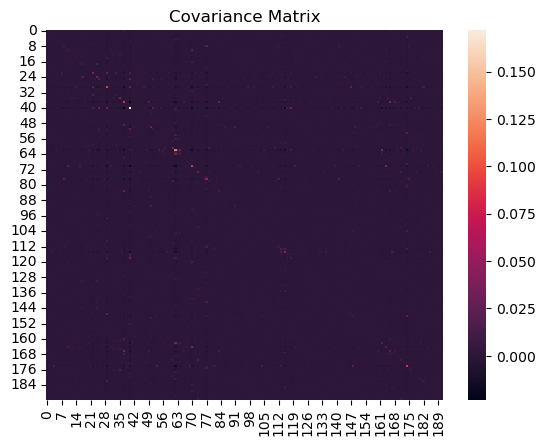

In [118]:
# making a covariance plot
import seaborn as sns

cov = np.cov(cast_vectors.T)
sns.heatmap(cov)
plt.title('Covariance Matrix')
plt.savefig(PLOT_FOLDER + "/covariance.png")
plt.show()


/Users/adamlass/anaconda3/envs/ditw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adamlass/anaconda3/envs/ditw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adamlass/anaconda3/envs/ditw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adamlass/anaconda3/envs/ditw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

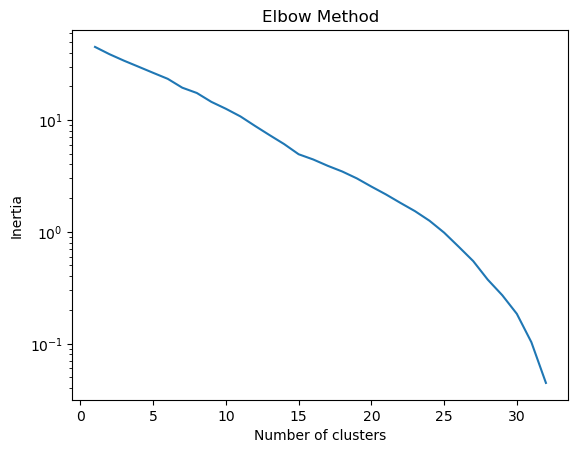

In [119]:
# applying k-means clustering and make elbow plot
from sklearn.cluster import KMeans

inertia = []
to = len(cast_vectors)
for i in range(1, to):
    # using the hamming distance
    kmeans = KMeans(n_clusters=i, random_state=0).fit(cast_vectors)
    inertia.append(kmeans.inertia_)
    

plt.plot(range(1, to), inertia)
plt.title('Elbow Method')
# logaritmic scale on y axis
plt.yscale('log')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig(PLOT_FOLDER + "/elbow.png")
plt.show()


/var/folders/wq/k5hy5l4j6pbd_js2dbk6vhfc0000gn/T/ipykernel_79414/3086989144.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist, method='complete')


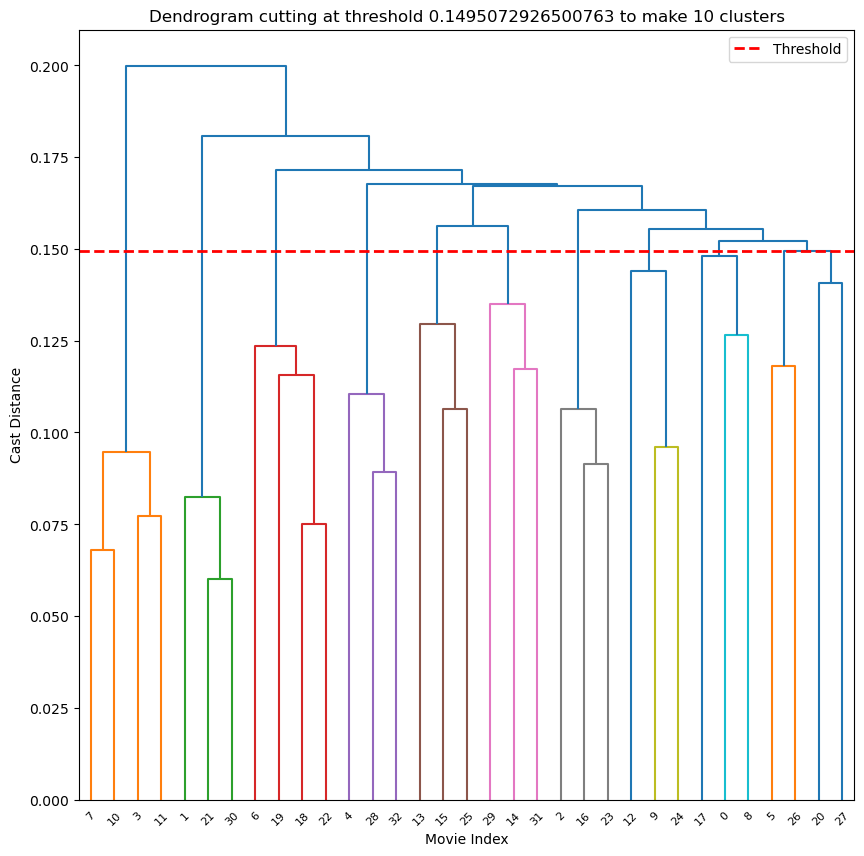

In [120]:
# trying with hiararchical clustering using hamming distance
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram

# using the hamming distance
dist = pairwise_distances(cast_vectors, metric='hamming')
link = linkage(dist, method='complete')

number_of_clusters = 10

max_d = 0
for i in range(len(link) + 1 - number_of_clusters):
    max_d = max(max_d, link[i][2])

# getting the clusters
clusters = {}
for i in range(len(link) + 1):
    clusters[i] = [i]

# ploting a threshold line based on max_d to make number_of_clusters clusters
plt.figure(figsize=(10, 10))
dendrogram(link , orientation='top')
plt.axhline(y=max_d, c='r', ls='--', lw=2, label='Threshold')
plt.title('Dendrogram cutting at threshold ' + str(max_d) + ' to make ' + str(number_of_clusters) + ' clusters')
plt.xlabel('Movie Index')
plt.ylabel('Cast Distance')
plt.savefig(PLOT_FOLDER + "/dendrogram_threshold.png")
plt.legend()
plt.show()


In [121]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(link, max_d, criterion='distance')
# print(clusters)

# getting the movies in each cluster
movies_in_clusters = {}
for i in range(len(clusters)):
    movie_title = df.iloc[i]['movie_name']
    cluster = clusters[i]
    if cluster in movies_in_clusters:
        movies_in_clusters[cluster].append(movie_title)
    else:
        movies_in_clusters[cluster] = [movie_title]

# printing the movies in each cluster
for cluster in movies_in_clusters:
    print('Cluster ' + str(cluster) + ':')
    print(movies_in_clusters[cluster])
    print('')


# loading annotated file
df = pd.read_csv('../data/processed/movie_stats/movie_stats_annotated.csv', index_col=0)

# appending the cluster column to df
df['film_series_cluster'] = clusters
# df.head()
# adding the original index column

df.to_csv('../data/processed/movie_stats/movie_stats_clustered.csv', index=True)

Cluster 9:
['The Marvels', 'Captain Marvel', 'Eternals']

Cluster 2:
['Guardians of the Galaxy Vol. 3', 'Guardians of the Galaxy Vol. 2', 'Guardians of the Galaxy']

Cluster 7:
['Spider-Man: No Way Home', 'Spider-Man: Homecoming', 'Spider-Man: Far From Home']

Cluster 1:
['Avengers: Infinity War', 'The Avengers', 'Avengers: Endgame', 'Avengers: Age of Ultron']

Cluster 4:
['Ant-Man and the Wasp: Quantumania', 'Ant-Man', 'Ant-Man and the Wasp']

Cluster 10:
['Black Panther: Wakanda Forever', 'Black Widow', 'Black Panther', 'The Incredible Hulk']

Cluster 3:
['Thor: Love and Thunder', 'Thor', 'Thor: Ragnarok', 'Thor: The Dark World']

Cluster 8:
['Doctor Strange in the Multiverse of Madness', 'Shang-Chi and the Legend of the Ten Rings', 'Doctor Strange']

Cluster 5:
['Iron Man', 'Iron Man 2', 'Iron Man 3']

Cluster 6:
['Captain America: Civil War', 'Captain America: The First Avenger', 'Captain America: The Winter Soldier']



In [122]:
    # loading file
# giving index a name
df = pd.read_csv('../data/processed/movie_stats/movie_stats_clustered.csv', index_col=0)
df = df.rename_axis('index')

In [123]:
# sorting df based on release date ascending
df = df.sort_values(by=['release_date'], ascending=True)

In [124]:
df.head()

,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue,film_series,film_series_cluster
index,,,,,,,,,,
13,Iron Man,tt0371746,2008-04-30,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...",['Jon Favreau'],['Marvel Studios'],140000000,585174222,8,5
27,The Incredible Hulk,tt0800080,2008-06-12,"{'Edward Norton': 'Bruce Banner / The Hulk', '...",['Louis Leterrier'],"['Marvel Studios', 'Valhalla Motion Pictures']",150000000,163712074,0,10
15,Iron Man 2,tt1228705,2010-04-28,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...",['Jon Favreau'],"['Marvel Studios', 'Fairview Entertainment']",200000000,623933331,8,5
18,Thor,tt0800369,2011-04-21,"{'Chris Hemsworth': 'Thor Odinson', 'Natalie P...",['Kenneth Branagh'],['Marvel Studios'],150000000,449326618,2,3
29,Captain America: The First Avenger,tt0458339,2011-07-22,{'Chris Evans': 'Steve Rogers / Captain Americ...,['Joe Johnston'],['Marvel Studios'],140000000,370569774,1,6


In [125]:
# extracting the clusters from df
clusters = df['film_series'].tolist()

In [126]:
df.head()

,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue,film_series,film_series_cluster
index,,,,,,,,,,
13,Iron Man,tt0371746,2008-04-30,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...",['Jon Favreau'],['Marvel Studios'],140000000,585174222,8,5
27,The Incredible Hulk,tt0800080,2008-06-12,"{'Edward Norton': 'Bruce Banner / The Hulk', '...",['Louis Leterrier'],"['Marvel Studios', 'Valhalla Motion Pictures']",150000000,163712074,0,10
15,Iron Man 2,tt1228705,2010-04-28,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...",['Jon Favreau'],"['Marvel Studios', 'Fairview Entertainment']",200000000,623933331,8,5
18,Thor,tt0800369,2011-04-21,"{'Chris Hemsworth': 'Thor Odinson', 'Natalie P...",['Kenneth Branagh'],['Marvel Studios'],150000000,449326618,2,3
29,Captain America: The First Avenger,tt0458339,2011-07-22,{'Chris Evans': 'Steve Rogers / Captain Americ...,['Joe Johnston'],['Marvel Studios'],140000000,370569774,1,6


In [127]:
film_series_sorted = {}

for movie in df.itertuples():
    # getting the index
    movie = tuple(movie)
    index = movie[0]
    # index = movie["Unnamed: 0"]
    film_series = movie[9]
    if film_series == 0:
        continue
    
    movie_tuple = (movie[1], movie[8], index, film_series)
    if film_series in film_series_sorted:
        film_series_sorted[film_series].append(movie_tuple)
    else:
        film_series_sorted[film_series] = [movie_tuple]

film_series_sorted


{8: [('Iron Man', 585174222, 13, 8),
  ('Iron Man 2', 623933331, 15, 8),
  ('Iron Man 3', 1215577205, 25, 8)],
 2: [('Thor', 449326618, 18, 2),
  ('Thor: The Dark World', 644783140, 22, 2),
  ('Thor: Ragnarok', 855301806, 19, 2),
  ('Thor: Love and Thunder', 760928081, 6, 2)],
 1: [('Captain America: The First Avenger', 370569774, 29, 1),
  ('Captain America: The Winter Soldier', 714766572, 31, 1),
  ('Captain America: Civil War', 1155046416, 14, 1)],
 6: [('The Avengers', 1518815515, 7, 6),
  ('Avengers: Age of Ultron', 1405403694, 11, 6),
  ('Avengers: Infinity War', 2052415039, 3, 6),
  ('Avengers: Endgame', 2800000000, 10, 6)],
 9: [('Guardians of the Galaxy', 772776600, 30, 9),
  ('Guardians of the Galaxy Vol. 2', 863756051, 21, 9),
  ('Guardians of the Galaxy Vol. 3', 845430302, 1, 9)],
 4: [('Ant-Man', 519311965, 28, 4),
  ('Ant-Man and the Wasp', 622674139, 32, 4),
  ('Ant-Man and the Wasp: Quantumania', 476071180, 4, 4)],
 7: [('Doctor Strange', 676343174, 24, 7),
  ('Doctor S

In [128]:
# # plotting the film series revenue over time for each cluster showing as a bar plot

# for film_series in film_series_sorted:
#     film_series_name = 'Film Series     ' + str(film_series)
#     film_series_revenue = film_series_sorted[film_series]
    
#     # extracting the movie names and revenues
#     movie_names = [movie[0] for movie in film_series_revenue]
#     movie_revenues = [movie[1] for movie in film_series_revenue]
    
#     first_movie_name = movie_names[0]
#     # plotting the bar plot
#     plt.figure(figsize=(10, 10))
#     plt.bar(movie_names, movie_revenues)
#     plt.title(f"Film Series starting with {first_movie_name}")
#     plt.xlabel('Movie Name')
#     plt.ylabel('Movie Revenue in Dollars')
#     plt.yticks(np.arange(0, max(movie_revenues) + 100000000, 100000000))
#     plt.xticks(rotation=10)
#     plt.savefig(PLOT_FOLDER + "/film_series_" + first_movie_name.lower().replace(" ", "_").replace(":", "") + ".png")
#     plt.show()

In [129]:
# loading file
df = pd.read_csv('../data/processed/movie_stats/movie_stats_clustered.csv', index_col=0)

In [130]:
df.head()

,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue,film_series,film_series_cluster
0,The Marvels,tt10676048,2023-11-08,{'Brie Larson': 'Carol Danvers / Captain Marve...,['Nia DaCosta'],"['Marvel Studios', 'Kevin Feige Productions']",274800000,108998133,0,9
1,Guardians of the Galaxy Vol. 3,tt6791350,2023-05-03,"{'Chris Pratt': 'Peter Quill / Star-Lord', 'Zo...",['James Gunn'],"['Marvel Studios', 'Kevin Feige Productions']",250000000,845430302,9,2
2,Spider-Man: No Way Home,tt10872600,2021-12-15,"{'Tom Holland': 'Peter Parker / Spider-Man', '...",['Jon Watts'],"['Marvel Studios', 'Pascal Pictures', 'Columbi...",200000000,1921847111,5,7
3,Avengers: Infinity War,tt4154756,2018-04-25,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...","['Anthony Russo', 'Joe Russo']",['Marvel Studios'],300000000,2052415039,6,1
4,Ant-Man and the Wasp: Quantumania,tt10954600,2023-02-15,"{'Paul Rudd': 'Scott Lang / Ant-Man', 'Evangel...",['Peyton Reed'],"['Marvel Studios', 'Kevin Feige Productions']",200000000,476071180,4,4


In [140]:
movie_successions = []

# (movie_name1, movie_name2, (movie_revenue2/movie_revenue1) - 1, cast_distance_from_first_movie)

for film_series_index, film_series in film_series_sorted.items():
    # print(film_series_index)
    for i in range(len(film_series) - 1):
        movie1 = film_series[i]
        movie2 = film_series[i+1]
        movie_name1 = movie1[0]
        movie_name2 = movie2[0]
        movie_revenue1 = movie1[1]
        movie_revenue2 = movie2[1]
        cast_vector1 = cast_vectors[movie1[2]]
        cast_vector2 = cast_vectors[movie2[2]]
        # distance in percentage
        sum_actors = np.sum(cast_vector1)
        print("sum_actors", sum_actors)
        diff = 0
        for i, actor in enumerate(cast_vector1):
            if actor != 0:
                actor_diff =  actor - cast_vector2[i]
                print("actor_diff", actor_diff)
                diff += max(0, actor_diff)
                # diff += actor * (1 - abs(cast_vector2[i] / actor))
                # diff += actor * min(1, cast_vector2[i] / actor)
        print("diff", diff)
        
        cast_similarity = 1 - (diff / sum_actors)
        # print("cast_similarity", cast_similarity)

        # cast_similarity = np.sum(np.abs(cast_vector1 - cast_vector2))
        print("cast_similarity", cast_similarity)
        # cast_similarity =  np.sum(cast_vector1) - cast_similarity
        # in percentage
        
        revenue_difference = (movie_revenue2/movie_revenue1) - 1
        # revenue_difference = movie_revenue2 - movie_revenue1

        movie_succession = (movie_name1, movie_name2, revenue_difference, cast_similarity)
        print(movie_succession)
        movie_successions.append(movie_succession)

sum_actors 2.9289682539682538
actor_diff 0.1
actor_diff -0.25
actor_diff 0.0
actor_diff 0.125
actor_diff 0.1111111111111111
actor_diff 0.3333333333333333
actor_diff 0.16666666666666666
actor_diff 0.2
actor_diff 0.14285714285714285
actor_diff 0.5
diff 1.678968253968254
cast_similarity 0.42677144018425683
('Iron Man', 'Iron Man 2', 0.06623516132944074, 0.42677144018425683)
sum_actors 2.9289682539682538
actor_diff 0.25
actor_diff 0.0
actor_diff 0.1
actor_diff 0.0
actor_diff 0.1111111111111111
actor_diff 0.0
actor_diff 0.125
actor_diff 0.14285714285714285
actor_diff 0.16666666666666666
actor_diff 0.2
diff 1.0956349206349205
cast_similarity 0.6259314456035767
('Iron Man 2', 'Iron Man 3', 0.9482485461255155, 0.6259314456035767)
sum_actors 2.9289682539682538
actor_diff -0.024999999999999994
actor_diff 0.0111111111111111
actor_diff 0.0
actor_diff 0.0
actor_diff 0.0
actor_diff 0.14285714285714285
actor_diff 0.125
actor_diff 0.16666666666666666
actor_diff 0.0
actor_diff 0.2
diff 0.64563492063492

/var/folders/wq/k5hy5l4j6pbd_js2dbk6vhfc0000gn/T/ipykernel_79414/2301932046.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([ '{:.0f}%'.format(x) for x in plt.gca().get_xticks()], c='#353535')
/var/folders/wq/k5hy5l4j6pbd_js2dbk6vhfc0000gn/T/ipykernel_79414/2301932046.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f"{'+' if x > 0 else '-' if x < 0 else ''}" + '{:.0f}%'.format(x) for x in plt.gca().get_yticks()], c='#353535')


f(x) = 0.32x + 8.41
[25.74176941 42.67714402 42.67714402 45.23777266 52.72998239 54.62674434
 54.95190354 57.47188728 58.17639886 61.26541119 62.59314456 67.84988484
 75.11177347 77.95691641 77.95691641 80.42270695 82.30592061 87.1020187 ]
[16.64274713 22.05956556 22.05956556 22.87858851 25.27498899 25.88167265
 25.98567556 26.79169815 27.01703779 28.00506548 28.42974404 30.11112448
 32.43385623 33.34388173 33.34388173 34.13257049 34.7349207  36.26896368]
[20.60859441 13.01420076 13.01420076 12.02314114  9.63148936  9.19646977
  9.1307504   8.71878713  8.63650365  8.45965445  8.47859874  9.09513165
 11.08193652 12.10212129 12.10212129 13.0605664  13.82969927 15.8992177 ]


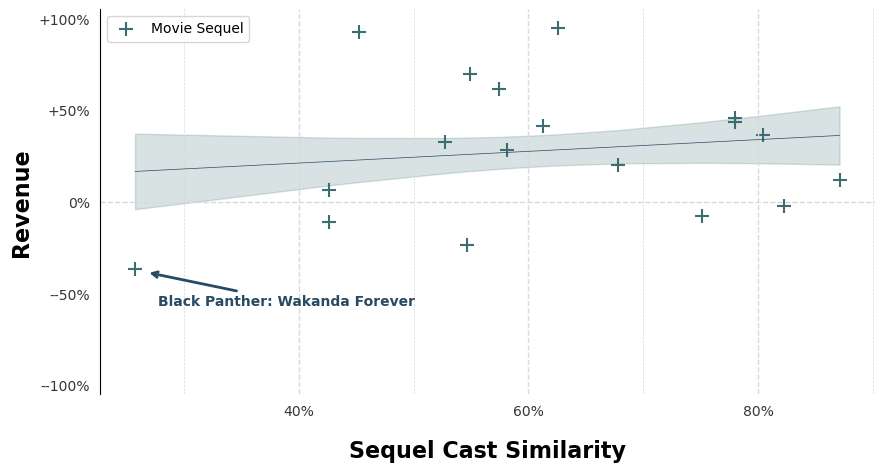

In [238]:
# making scatter plot
# cast similaryty on x
# revenue development on y

# getting the x and y values
from pstats import Stats
from matplotlib.ticker import MultipleLocator


x = [movie_succession[3] * 100 for movie_succession in movie_successions]
y = [movie_succession[2] * 100 for movie_succession in movie_successions]

# plotting the scatter plot
plt.figure(figsize=(10, 5))

# crosses
plt.scatter(x, y, c='#3c6e71', s=100, marker='+', label='Movie Sequel')
# plt.title('Revenue of Movie Successor based on Cast Similarity', fontdict={'fontsize': 18 }, y=1.05)

plt.xlabel('Sequel Cast Similarity', fontdict={'fontsize': 16, 'fontweight': 'bold'}, labelpad=15)

plt.ylabel('Revenue', fontdict={'fontsize': 16, 'fontweight': 'bold'})



# x scale from 0 to 100%
# y scale from -1 to 1
# plt.xlim(0, 101)
plt.ylim(-105, 105)



# remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().tick_params(axis='x', which='both', bottom=False)
plt.gca().tick_params(axis='y', which='both', left=False)

plt.gca().xaxis.set_minor_locator(MultipleLocator(10))
plt.gca().xaxis.set_major_locator(MultipleLocator(20))
plt.gca().yaxis.set_major_locator(MultipleLocator(50))
# plt.gca().grid(True, axis='y')
plt.gca().grid(True, axis='x', which='major', linestyle='--', c='#d9d9d9', lw=1)
plt.gca().grid(True, axis='x', which='minor', linestyle='--', c='#d9d9d9', lw=0.5)
# plt.gca().grid(True, axis='x', which='minor', linestyle='--')

# +/- percentage sign on x axis ticks
plt.gca().set_xticklabels([ '{:.0f}%'.format(x) for x in plt.gca().get_xticks()], c='#353535')

# percentage sign on y axis ticks
plt.gca().set_yticklabels([f"{'+' if x > 0 else '-' if x < 0 else ''}" + '{:.0f}%'.format(x) for x in plt.gca().get_yticks()], c='#353535')

# horizontal line at 0

annotated_indexes = [17]
# annotating the points
for i, txt in enumerate([movie_succession[1] for movie_succession in movie_successions]):
    # plt.annotate(f"{i}-{txt}", (x[i], y[i]))
    if i in annotated_indexes:
        # bold
        plt.annotate(txt, (x[i] + 1 , y[i] - 2),  fontsize=10, arrowprops=dict(arrowstyle='->', color='#284b63', lw=2), xytext=(x[i] + 2, y[i] - 20), c='#284b63', fontweight='bold')

plt.axhline(y=0, c='#d9d9d9', ls='--', lw=1)


# removing outliers
x = np.array(x)
y = np.array(y)

# sorting x and y based on x
args = x.argsort()
x = x[args]
y = y[args]

# removing the outliers
# z_scores = np.abs((x - np.mean(x)) / np.std(x))
# threshold = 3
# x = x[z_scores < threshold]
# y = y[z_scores < threshold]

# fitting a linear regression line to the data with removed outliers
m, b = np.polyfit(x, y, 1)

# x = np.arange(0, 100, 1)
# y = m * x + b

# plt.plot(x, m*x + b, c='#3c6e71', lw=0.5)
print(f"f(x) = {m:.2f}x + {b:.2f}")

y_est = m * x + b
y_err = (np.array(y)-y_est).std() * np.sqrt(1/len(x) + (x - x.mean())**2 / np.sum((x - x.mean())**2))
plt.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2, color='#3c6e71')

print(x)
print(y_est)
print(y_err)


plt.plot(x, y_est, c='#284b63', lw=0.5)




point = 20
# plt.annotate("Linear Regression without Outliers", (point, m*point + b + 5),  fontsize=10, rotation=m*13, c='red')

plt.legend(loc='upper left')

plt.savefig(PLOT_FOLDER + "/revenue_vs_cast_similarity.png", bbox_inches='tight', dpi=1000)
plt.show()
